In [9]:
import os
os.getcwd()
os.chdir('./drive/MyDrive/Fanshawe College/6154/Session 01/')

# What Is Optimization in ML?

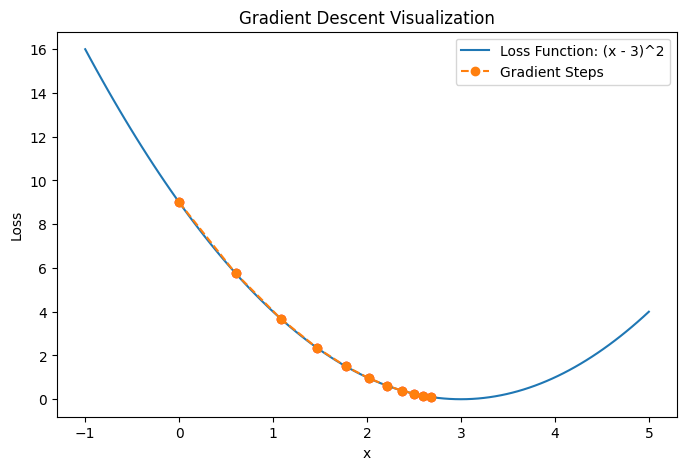

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the loss function and its derivative
def loss(x):
    return (x - 3)**2

def grad_loss(x):
    return 2 * (x - 3)

# Gradient Descent
x_vals = [0]  # Starting point
lr = 0.1
x = x_vals[0]

for _ in range(10):
    x -= lr * grad_loss(x)
    x_vals.append(x)

# Plotting
x_plot = np.linspace(-1, 5, 100)
y_plot = loss(x_plot)

plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, label='Loss Function: (x - 3)^2')
plt.scatter(x_vals, [loss(xi) for xi in x_vals], color='red')
plt.plot(x_vals, [loss(xi) for xi in x_vals], '--o', label='Gradient Steps')
plt.xlabel("x")
plt.ylabel("Loss")
plt.title("Gradient Descent Visualization")
plt.legend()
plt.savefig("./What_Is_Optimization_in_ML.pdf", format='pdf')  # Save as PDF
plt.show()


# Key Components of Optimization

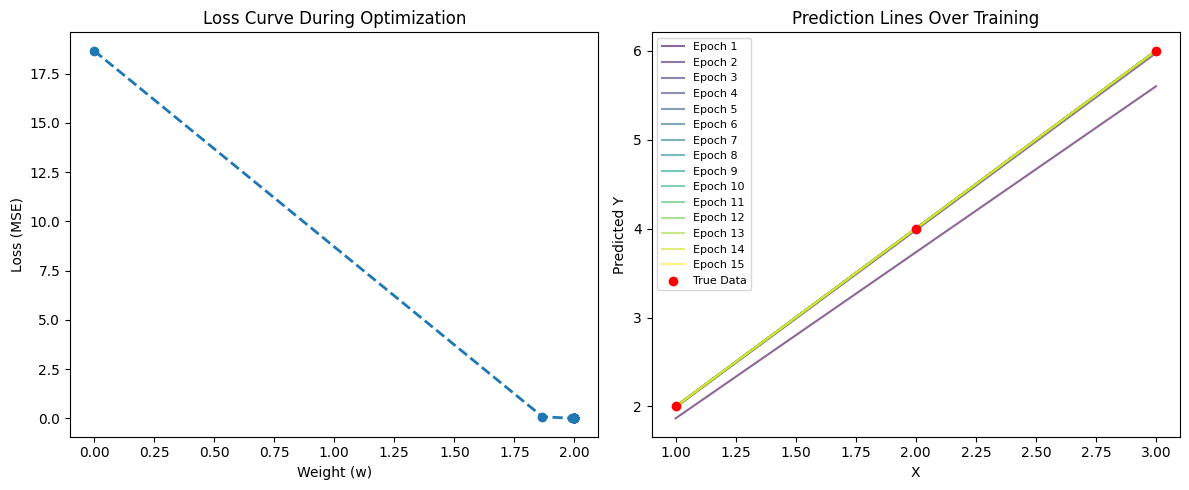

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Training data: simple linear relation
X = np.array([1, 2, 3])
Y = np.array([2, 4, 6])

# Parameters for training
w = 0.0
lr = 0.1
epochs = 15

# Containers for recording updates
w_vals = [w]
loss_vals = []
predictions_per_epoch = []

# Define loss and gradient
def compute_loss(w):
    return np.mean((w * X - Y) ** 2)

def compute_grad(w):
    return np.mean(2 * X * (w * X - Y))

# Optimization loop with prediction snapshots
for _ in range(epochs):
    loss = compute_loss(w)
    grad = compute_grad(w)
    w -= lr * grad
    predictions_per_epoch.append(w * X)
    w_vals.append(w)
    loss_vals.append(loss)

# Plotting loss curve
plt.figure(figsize=(12, 5))

# Left: Loss vs weight
plt.subplot(1, 2, 1)
plt.plot(w_vals[:-1], loss_vals, 'o--', linewidth=2, markersize=6)
plt.xlabel("Weight (w)")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve During Optimization")

# Right: Predictions vs true data
plt.subplot(1, 2, 2)
colors = plt.cm.viridis(np.linspace(0, 1, epochs))
for i, preds in enumerate(predictions_per_epoch):
    plt.plot(X, preds, color=colors[i], alpha=0.6, label=f"Epoch {i+1}")
plt.scatter(X, Y, c='red', label="True Data", zorder=5)
plt.title("Prediction Lines Over Training")
plt.xlabel("X")
plt.ylabel("Predicted Y")
plt.legend(fontsize=8, loc='upper left')
plt.tight_layout()
plt.savefig("./Key_Components_of_Optimization.pdf", format="pdf")
plt.show()


# Practical Failures of Optimization

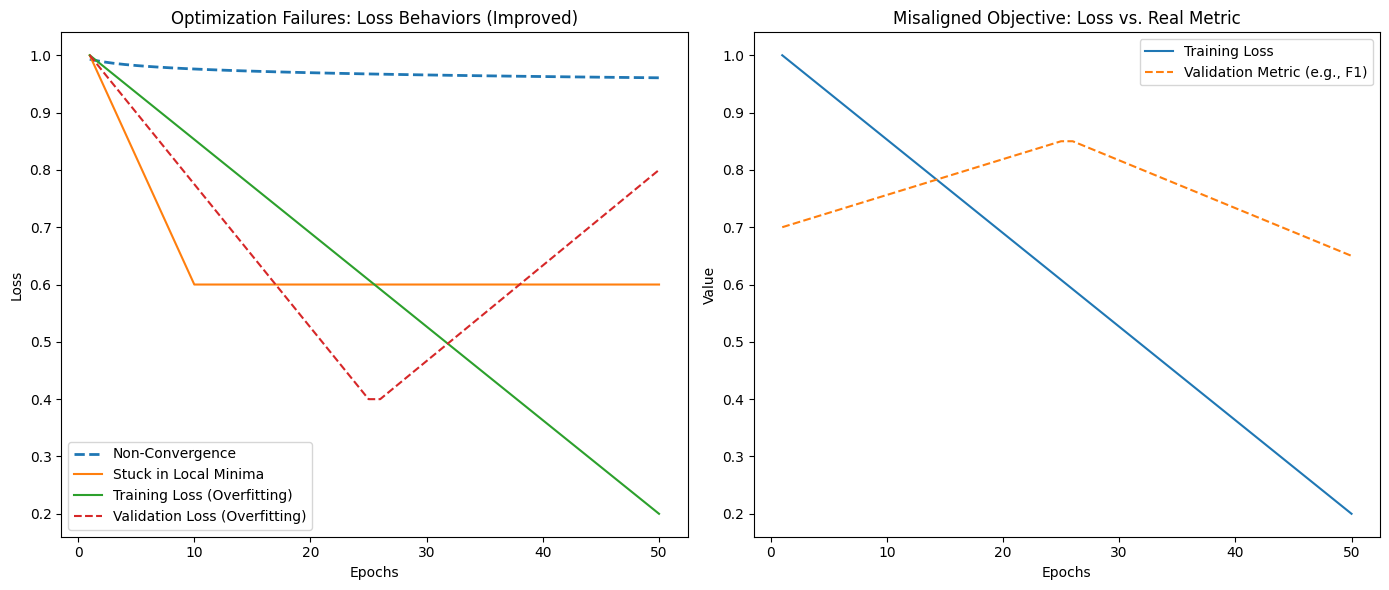

In [16]:
# Updating non-convergence simulation to better reflect realistic behavior (very slow decay)
non_convergence = 1.0 - 0.01 * np.log(epochs + 1)  # Very slow progress, nearly flat

# Re-plotting with improved non-convergence curve
plt.figure(figsize=(14, 6))

# First plot: Loss behavior
plt.subplot(1, 2, 1)
plt.plot(epochs, non_convergence, label="Non-Convergence", linestyle='--', linewidth=2)
plt.plot(epochs, local_minima, label="Stuck in Local Minima")
plt.plot(epochs, train_loss, label="Training Loss (Overfitting)")
plt.plot(epochs, val_loss, label="Validation Loss (Overfitting)", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Optimization Failures: Loss Behaviors (Improved)")
plt.legend()

# Second plot: Metric mismatch
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_metric, label="Validation Metric (e.g., F1)", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("Misaligned Objective: Loss vs. Real Metric")
plt.legend()

plt.tight_layout()
plt.savefig("./Practical_Failures_of_Optimization_1.pdf", format="pdf")
plt.show()


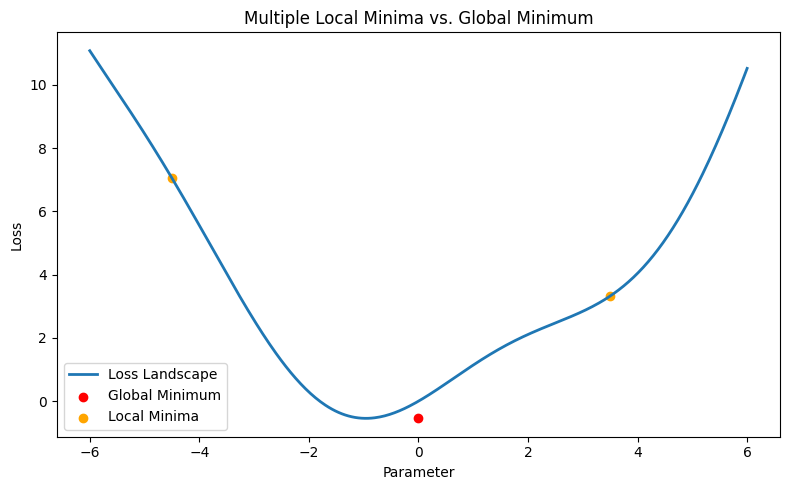

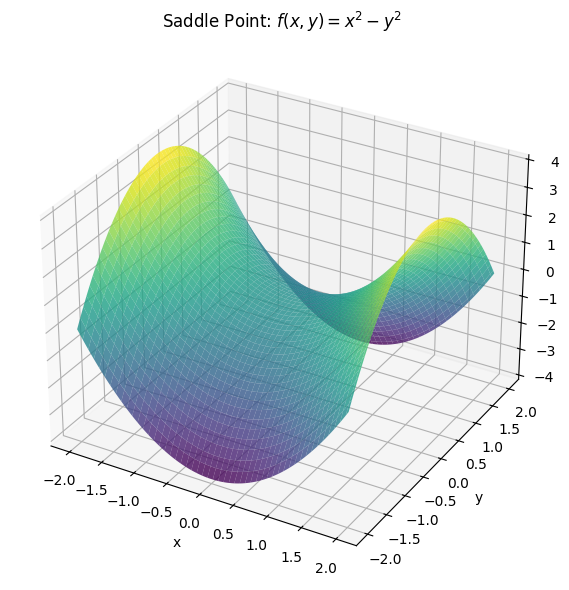

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Plot 1: Multiple Local Minima and Global Minimum
x1 = np.linspace(-6, 6, 400)
y1 = np.sin(x1) + 0.3 * x1**2

# Plot 2: Saddle Point in 3D
from mpl_toolkits.mplot3d import Axes3D

x2 = np.linspace(-2, 2, 100)
y2 = np.linspace(-2, 2, 100)
X2, Y2 = np.meshgrid(x2, y2)
Z2 = X2**2 - Y2**2  # Saddle function: f(x, y) = x^2 - y^2

# Plot 3: Underfitting vs Overfitting vs Best Fit (Training & Validation Loss)
epochs = np.arange(1, 51)
underfit_train = np.linspace(1.0, 0.9, 50)
underfit_val = np.linspace(1.2, 1.0, 50)

best_train = np.linspace(1.0, 0.2, 50)
best_val = np.concatenate([np.linspace(1.2, 0.3, 40), np.linspace(0.3, 0.35, 10)])

overfit_train = np.linspace(1.0, 0.1, 50)
overfit_val = np.concatenate([np.linspace(1.2, 0.4, 25), np.linspace(0.4, 0.9, 25)])

# --- Save First Plot: Local & Global Minima ---
plt.figure(figsize=(8, 5))
plt.plot(x1, y1, label="Loss Landscape", linewidth=2)
plt.scatter([0], [np.min(y1)], color='red', label="Global Minimum")
plt.scatter([-4.5, 3.5], [y1[np.abs(x1 + 4.5).argmin()], y1[np.abs(x1 - 3.5).argmin()]],
            color='orange', label="Local Minima")
plt.title("Multiple Local Minima vs. Global Minimum")
plt.xlabel("Parameter")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("./Practical_Failures_of_Optimization_2.pdf", format="pdf")
plt.show()

# --- Save Second Plot: Saddle Point ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X2, Y2, Z2, cmap='viridis', alpha=0.8)
ax.set_title("Saddle Point: $f(x, y) = x^2 - y^2$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.tight_layout()
plt.savefig("./Practical_Failures_of_Optimization_3.pdf", format="pdf")
plt.show()




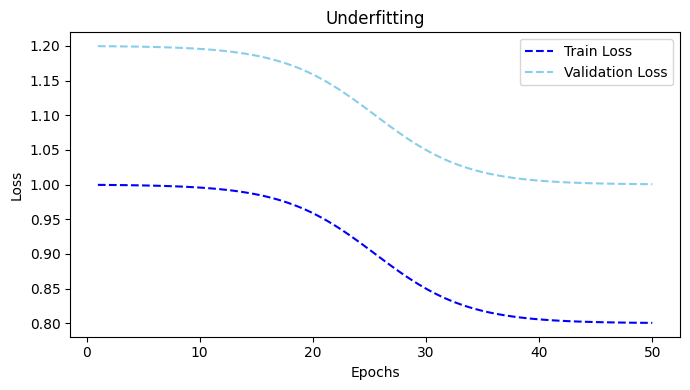

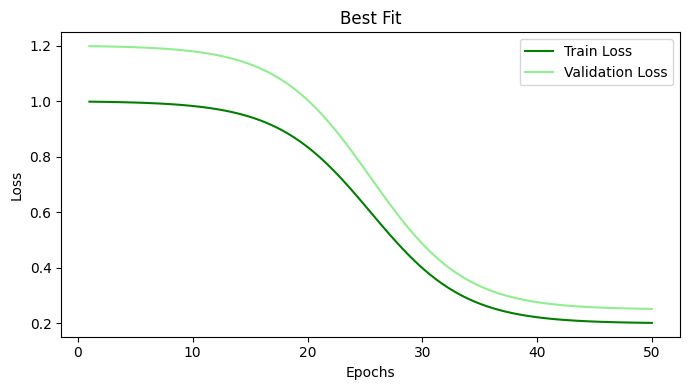

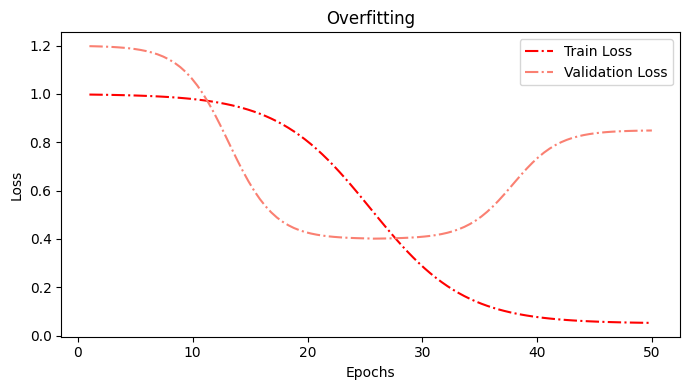

In [18]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.linspace(1, 50, 100)

# Generate smooth sigmoid-style curves for realism
def smooth_curve(start, end, length):
    x = np.linspace(-6, 6, length)
    return start + (end - start) / (1 + np.exp(-x))

# Underfitting
underfit_train = smooth_curve(1.0, 0.8, len(epochs))
underfit_val = smooth_curve(1.2, 1.0, len(epochs))

# Best Fit
best_train = smooth_curve(1.0, 0.2, len(epochs))
best_val = smooth_curve(1.2, 0.25, len(epochs))

# Overfitting
overfit_train = smooth_curve(1.0, 0.05, len(epochs))
overfit_val = np.concatenate([
    smooth_curve(1.2, 0.4, len(epochs) // 2),
    smooth_curve(0.4, 0.85, len(epochs) // 2)
])

# Plot 1: Underfitting
plt.figure(figsize=(7, 4))
plt.plot(epochs, underfit_train, label="Train Loss", linestyle="--", color='blue')
plt.plot(epochs, underfit_val, label="Validation Loss", linestyle="--", color='skyblue')
plt.title("Underfitting")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("./Practical_Failures_of_Optimization_5.pdf", format="pdf")
plt.show()

# Plot 2: Best Fit
plt.figure(figsize=(7, 4))
plt.plot(epochs, best_train, label="Train Loss", linestyle="-", color='green')
plt.plot(epochs, best_val, label="Validation Loss", linestyle="-", color='lightgreen')
plt.title("Best Fit")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("./Practical_Failures_of_Optimization_6.pdf", format="pdf")
plt.show()

# Plot 3: Overfitting
plt.figure(figsize=(7, 4))
plt.plot(epochs, overfit_train, label="Train Loss", linestyle="-.", color='red')
plt.plot(epochs, overfit_val, label="Validation Loss", linestyle="-.", color='salmon')
plt.title("Overfitting")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("./Practical_Failures_of_Optimization_7.pdf", format="pdf")
plt.show()
